#  <font color='dark gary'> Anomaly detection method
https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection
<img src = 'https://sdk.finance/wp-content/uploads/2021/04/anomaly_detection-768x512.png'>

### 1. Supervised learning

### 2. Semi-Supervised learning (Novelty detection)
- 새로운 한번도 보지 못한 데이터가 outlier인지 아닌지 판단(훈련데이터에 outlier가 없음)

### 3. Unsupervised learning (Outlier detection)
- inlier와 outlier를 포함한 훈련데이터에서 outliers를 탐색
        * Anomaly는 outlier와 novelty를 모두 호칭

https://github.com/yzhao062/anomaly-detection-resources
- 응용 분야
     * Data cleaning
     * Fraud detection like credit card frauds or security breaches
     * Health monitoring of people, systems, and machines

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

### 불균형데이터 유형
- 이상치는 극히 심한 불균형데이터와 같은 유형을 갖는다.
- make_classification() 함수에 클라스를 무작위로 교환하여 분류를 어렵게 함, flip_y=0

In [3]:
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

Counter(y)

Counter({0: 990, 1: 10})

### 단변량으로 시각화하면 이상치를 발견하기 어려움

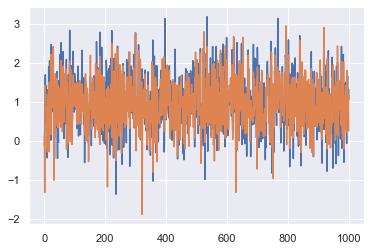

In [13]:
plt.plot(X[:, 0])
plt.plot(X[:, 1])

### 다변량, combination으로 시각화하면 이상치를 발견할 수있음

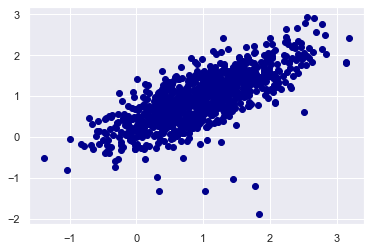

In [19]:
plt.scatter(X[:, 0], X[:, 1], c='darkblue') # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

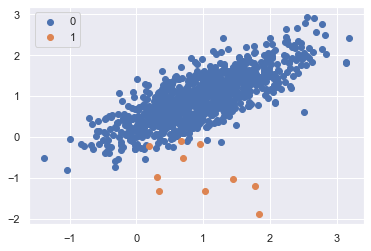

In [4]:
for label, _ in Counter(y).items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()

# <font color='red'> 1. Supervised Learning

In [24]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
boston_dataset.keys()
boston_dataset.target[0:10]

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

## 1.1 Interquartile Range(IQR) - Box plot으로 outlier 탐색
단일 변수의 백분위수 (range)를 확인하여 이상치(outlier)를 그려보고 확인한다

<AxesSubplot:>

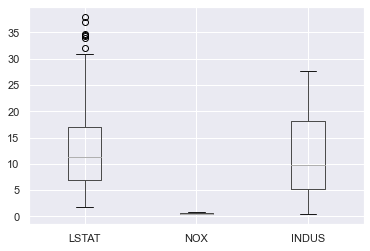

In [26]:
cols = ['LSTAT','NOX','INDUS']
boston.boxplot(column=cols)

## 1.2 확률밀도함수로 이상치 확인

단일변수의 확률밀도 함수를 확인하여 이상치를 p-value로 확인한다

In [27]:
import scipy as sp
sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1
rv = sp.stats.norm(loc=0, scale=1)
(1- rv.pdf(1.96), 1- rv.pdf(2.58))

(0.9415590556665485, 0.9856948910058503)

가우시안 분포를 가정하여 pdf(probability density distribution)이 임계치를 넘으면 이상치라고 판단

array([[<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'INDUS'}>, <AxesSubplot:>]],
      dtype=object)

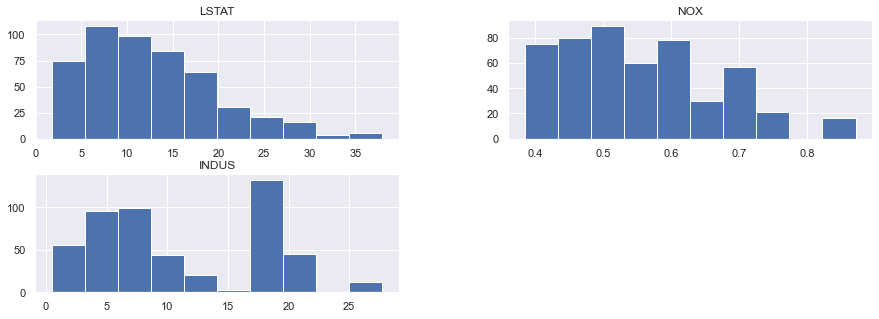

In [28]:
data = boston[cols]
data.hist(figsize=(15,5))

In [29]:
for col in data.columns:
    col

'LSTAT'

'NOX'

'INDUS'

In [30]:
for col in data.columns:
    data[col] = (data[col] -data[col].mean())/data[col].std()
    data[col + '_pdf'] = rv.pdf(data[col])

In [32]:
data
data[(data['LSTAT_pdf'] < 0.01) | (data['LSTAT_pdf'] > 0.99)]

,LSTAT,NOX,INDUS,LSTAT_pdf,NOX_pdf,INDUS_pdf
0,-1.074499,-0.144075,-1.286636,0.223977,0.394823,0.174356
1,-0.491953,-0.739530,-0.592794,0.353473,0.303495,0.334660
2,-1.207532,-0.739530,-0.592794,0.192433,0.303495,0.334660
3,-1.360171,-0.834458,-1.305586,0.158188,0.281648,0.170126
4,-1.025487,-0.834458,-1.305586,0.235805,0.281648,0.170126
...,...,...,...,...,...,...
501,-0.417734,0.157968,0.115624,0.365610,0.393996,0.396284
502,-0.500355,0.157968,0.115624,0.352003,0.393996,0.396284
503,-0.982076,0.157968,0.115624,0.246307,0.393996,0.396284
504,-0.864446,0.157968,0.115624,0.274564,0.393996,0.396284


,LSTAT,NOX,INDUS,LSTAT_pdf,NOX_pdf,INDUS_pdf
141,3.046737,0.598087,1.567444,0.003848,0.333607,0.116790
373,3.097150,0.977798,1.014995,0.003296,0.247342,0.238343
374,3.545262,0.977798,1.014995,0.000744,0.247342,0.238343
412,3.041136,0.365083,1.014995,0.003914,0.373222,0.238343
414,3.406628,1.193543,1.014995,0.001205,0.195693,0.238343
438,2.992123,1.599143,1.014995,0.004538,0.111073,0.238343


array([[<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'INDUS'}>, <AxesSubplot:>]],
      dtype=object)

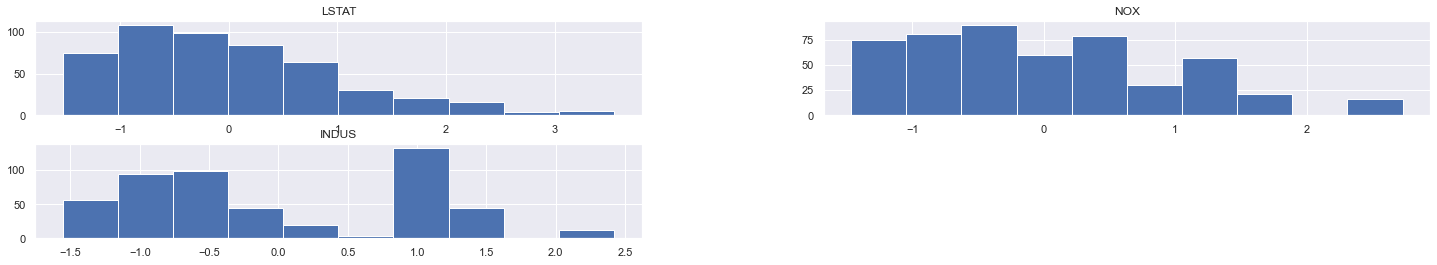

array([[<AxesSubplot:title={'center':'LSTAT_pdf'}>,
        <AxesSubplot:title={'center':'NOX_pdf'}>],
       [<AxesSubplot:title={'center':'INDUS_pdf'}>, <AxesSubplot:>]],
      dtype=object)

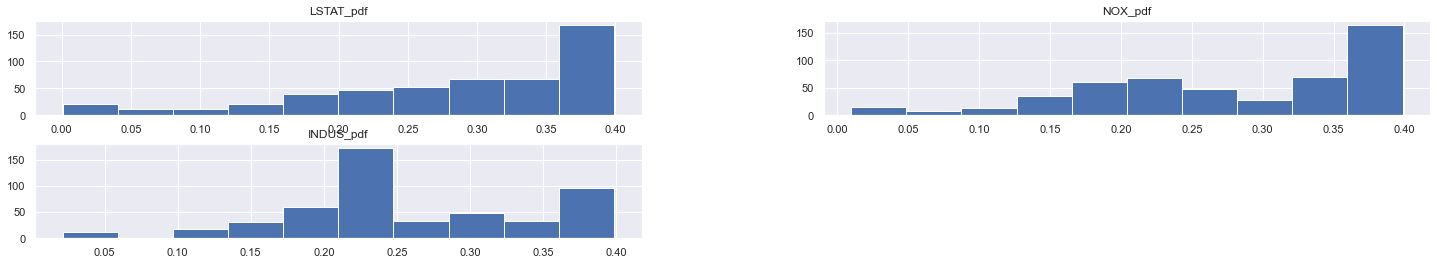

In [39]:
data.loc[:, 'LSTAT': 'INDUS'].hist(figsize=(25,4)); plt.show()
data.loc[:, 'LSTAT_pdf': 'INDUS_pdf'].hist(figsize=(25,4))

## 1.3 K-Nearest neighbors 이상치 확인
- Unsupervised K-Nearest Neighbors
- https://scikit-learn.org/stable/modules/neighbors.html
- SVM도 SVM hyperplane에서 거리를 기준으로 이상치 확인 가능

In [40]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 3)
data = boston[cols]
nbrs.fit(data)

NearestNeighbors(n_neighbors=3)

### distances : distances between data points
### indices : associated index values — that can be used for detecting anomalies.

In [41]:
distances, indices = nbrs.kneighbors(data)
distances
indices

array([[0.        , 0.15506128, 0.16911535],
       [0.        , 0.44061434, 0.95830267],
       [0.        , 0.67304086, 0.82591828],
       ...,
       [0.        , 0.84      , 1.13771701],
       [0.        , 0.84      , 0.95838197],
       [0.        , 1.18135515, 1.2       ]])

array([[  0, 298, 179],
       [  1,  44, 236],
       [  2, 277,  41],
       ...,
       [503, 504,  72],
       [504, 503,  74],
       [505,  73, 502]], dtype=int64)

In [42]:
knn_summary = pd.DataFrame(np.hstack((data.values, distances, indices.astype(int))), 
                           columns = ['LSTAT', 'NOX', 'INDUS', 'dis-01', 'dis-02', 'dis-03', 'knn-0', 'knn-1', 'knn-2'])
knn_summary

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2
0,4.98,0.538,2.31,0.0,0.155061,0.169115,0.0,298.0,179.0
1,9.14,0.469,7.07,0.0,0.440614,0.958303,1.0,44.0,236.0
2,4.03,0.469,7.07,0.0,0.673041,0.825918,2.0,277.0,41.0
3,2.94,0.458,2.18,0.0,0.230757,0.505327,3.0,202.0,204.0
4,5.33,0.458,2.18,0.0,0.120000,0.364040,4.0,5.0,355.0
...,...,...,...,...,...,...,...,...,...
501,9.67,0.573,11.93,0.0,0.590000,1.073963,501.0,502.0,79.0
502,9.08,0.573,11.93,0.0,0.590000,0.910437,502.0,501.0,79.0
503,5.64,0.573,11.93,0.0,0.840000,1.137717,503.0,504.0,72.0
504,6.48,0.573,11.93,0.0,0.840000,0.958382,504.0,503.0,74.0


### 인스턴스별로 가장 가까운 KNN(3)을 '1'로 표기

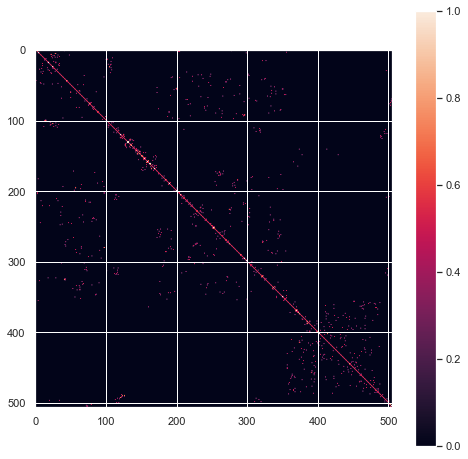

In [43]:
nbrs.kneighbors_graph(data).toarray()
plt.figure(figsize=(8,8))
plt.imshow(nbrs.kneighbors_graph(data).toarray())
plt.colorbar();

In [44]:
knn_summary['distance_mean'] = distances.mean(axis =1)
knn_summary

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean
0,4.98,0.538,2.31,0.0,0.155061,0.169115,0.0,298.0,179.0,0.108059
1,9.14,0.469,7.07,0.0,0.440614,0.958303,1.0,44.0,236.0,0.466306
2,4.03,0.469,7.07,0.0,0.673041,0.825918,2.0,277.0,41.0,0.499653
3,2.94,0.458,2.18,0.0,0.230757,0.505327,3.0,202.0,204.0,0.245362
4,5.33,0.458,2.18,0.0,0.120000,0.364040,4.0,5.0,355.0,0.161347
...,...,...,...,...,...,...,...,...,...,...
501,9.67,0.573,11.93,0.0,0.590000,1.073963,501.0,502.0,79.0,0.554654
502,9.08,0.573,11.93,0.0,0.590000,0.910437,502.0,501.0,79.0,0.500146
503,5.64,0.573,11.93,0.0,0.840000,1.137717,503.0,504.0,72.0,0.659239
504,6.48,0.573,11.93,0.0,0.840000,0.958382,504.0,503.0,74.0,0.599461


<AxesSubplot:>

Text(0.5, 1.0, 'Distance mean of KNN')

Text(0.5, 0, 'Instances')

Text(0, 0.5, 'Mean of Distance')

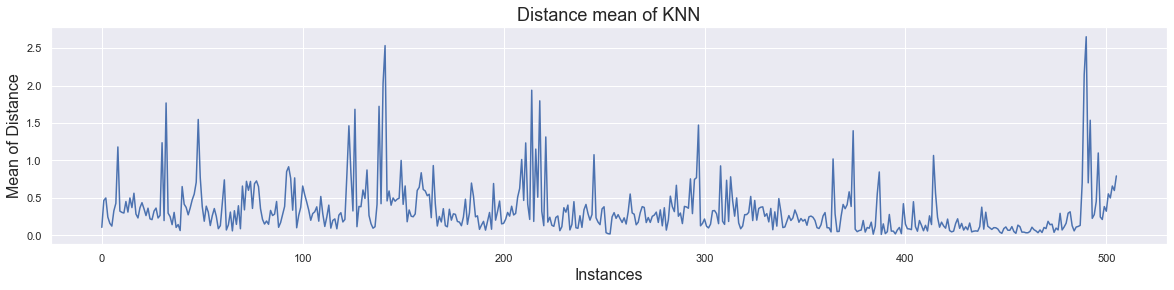

In [45]:
# plot mean of k-distances of each observation
knn_summary['distance_mean'].plot(figsize=(20,4))
plt.title('Distance mean of KNN', fontsize = 18)
plt.xlabel('Instances', fontsize = 16); plt.ylabel('Mean of Distance', fontsize = 16)

### Spike 되는 instance는 anomaly이며, 평균 거리가 '1.5'이상이면 이상치라고 판단

In [46]:
outlier_index = np.where(distances.mean(axis = 1) > 1.5)
outlier_index

(array([ 32,  48, 126, 138, 140, 141, 214, 218, 489, 490, 492], dtype=int64),)

In [47]:
outlier_values = knn_summary.iloc[outlier_index]
outlier_values

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean
32,27.71,0.538,8.14,0.0,2.236402,3.064392,32.0,8.0,214.0,1.766932
48,30.81,0.448,6.91,0.0,1.304521,3.336315,48.0,8.0,32.0,1.546946
126,27.26,0.581,25.65,0.0,1.850000,3.197700,126.0,123.0,490.0,1.682567
138,21.32,0.624,21.89,0.0,2.326802,2.840000,138.0,149.0,140.0,1.722267
140,24.16,0.624,21.89,0.0,2.840000,3.241097,140.0,138.0,143.0,2.027032
141,34.41,0.624,21.89,0.0,3.790307,3.807313,141.0,412.0,373.0,2.532540
214,29.55,0.489,10.59,0.0,2.746639,3.064392,214.0,8.0,32.0,1.937010
218,17.92,0.550,13.89,0.0,2.083283,3.303532,218.0,297.0,207.0,1.795605
489,23.97,0.609,27.74,0.0,2.538205,3.897818,489.0,123.0,126.0,2.145341
490,29.68,0.609,27.74,0.0,3.197700,4.754133,490.0,126.0,123.0,2.650611


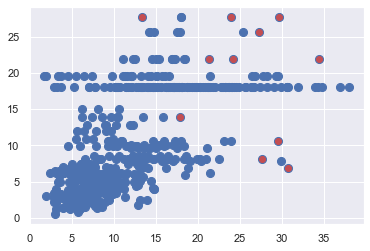

In [48]:
plt.scatter(knn_summary['LSTAT'], knn_summary['INDUS'], color = "b", s = 65)
plt.scatter(outlier_values['LSTAT'], outlier_values['INDUS'], color = "r")

### 3차원 그림으로 확인

In [49]:
knn_summary['anomaly'] = 0
knn_summary

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean,anomaly
0,4.98,0.538,2.31,0.0,0.155061,0.169115,0.0,298.0,179.0,0.108059,0
1,9.14,0.469,7.07,0.0,0.440614,0.958303,1.0,44.0,236.0,0.466306,0
2,4.03,0.469,7.07,0.0,0.673041,0.825918,2.0,277.0,41.0,0.499653,0
3,2.94,0.458,2.18,0.0,0.230757,0.505327,3.0,202.0,204.0,0.245362,0
4,5.33,0.458,2.18,0.0,0.120000,0.364040,4.0,5.0,355.0,0.161347,0
...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,0.573,11.93,0.0,0.590000,1.073963,501.0,502.0,79.0,0.554654,0
502,9.08,0.573,11.93,0.0,0.590000,0.910437,502.0,501.0,79.0,0.500146,0
503,5.64,0.573,11.93,0.0,0.840000,1.137717,503.0,504.0,72.0,0.659239,0
504,6.48,0.573,11.93,0.0,0.840000,0.958382,504.0,503.0,74.0,0.599461,0


In [50]:
knn_summary.loc[knn_summary['distance_mean'] > 1.5, 'anomaly'] = 1
knn_summary['anomaly'].value_counts()
knn_summary

0    495
1     11
Name: anomaly, dtype: int64

,LSTAT,NOX,INDUS,dis-01,dis-02,dis-03,knn-0,knn-1,knn-2,distance_mean,anomaly
0,4.98,0.538,2.31,0.0,0.155061,0.169115,0.0,298.0,179.0,0.108059,0
1,9.14,0.469,7.07,0.0,0.440614,0.958303,1.0,44.0,236.0,0.466306,0
2,4.03,0.469,7.07,0.0,0.673041,0.825918,2.0,277.0,41.0,0.499653,0
3,2.94,0.458,2.18,0.0,0.230757,0.505327,3.0,202.0,204.0,0.245362,0
4,5.33,0.458,2.18,0.0,0.120000,0.364040,4.0,5.0,355.0,0.161347,0
...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,0.573,11.93,0.0,0.590000,1.073963,501.0,502.0,79.0,0.554654,0
502,9.08,0.573,11.93,0.0,0.590000,0.910437,502.0,501.0,79.0,0.500146,0
503,5.64,0.573,11.93,0.0,0.840000,1.137717,503.0,504.0,72.0,0.659239,0
504,6.48,0.573,11.93,0.0,0.840000,0.958382,504.0,503.0,74.0,0.599461,0


<Figure size 720x720 with 0 Axes>

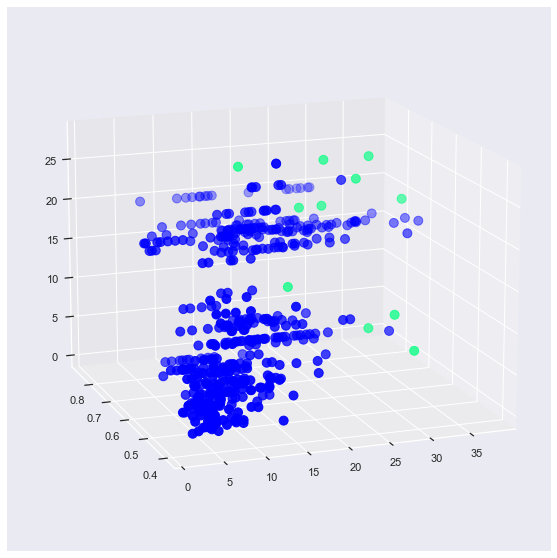

In [51]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(knn_summary['LSTAT'], knn_summary['NOX'], knn_summary['INDUS'], 
             c= knn_summary['anomaly'], s=80,
             cmap='winter')
ax.view_init(15, 250) 

#  <font color='red'> 2. Semi-Supervised learning (Novelty detection)
## One-class SVM with non-linear kernel (RBF)
- OCSVM assumes that anomalies can form dense clusters as long as they form a low-density region in the training dataset.
- OCSVM mode is trained in only one class, referred to as the normal class. The model learns all the features and patterns of the normal class 
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

#### <p> <font color= 'blue'> Intuition : One-class SVM is based on SVM, which uses a hyperplane to seperate two classes while a  <b>One-class SVM uses a hypersphere to emcompass all of the observations<b> <p>

# 예제1
예측한 y값이 1은 정상(inlier)을, -1은 이상치(outlier)

In [52]:
from sklearn.svm import OneClassSVM
X = [[0], [0.44], [0.45], [0.46], [1]]
X
clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)

[[0], [0.44], [0.45], [0.46], [1]]

array([-1,  1,  1,  1, -1], dtype=int64)

In [53]:
clf.decision_function(X)
clf.decision_function(X).round(2)

array([-2.74925564e-01,  5.28455635e-09,  8.06251090e-04,  1.35696904e-03,
       -3.21513634e-01])

array([-0.27,  0.  ,  0.  ,  0.  , -0.32])

In [54]:
clf.score_samples(X)

array([1.77987316, 2.05479873, 2.05560497, 2.05615569, 1.73328509])

# 예제 2
- https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#one-class-svm-with-non-linear-kernel-rbf

In [64]:
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.font_manager

## 1. 훈련데이터 생성(outliers가 없음, 모두 정상 데이터)
## 1.1 Generate data (X)

array([[-0.1928726 , -0.3043479 ],
       [ 0.02646949,  0.06109026],
       [ 0.22088454, -0.07109334],
       [-0.08558803, -0.23483025],
       [-0.06599418,  0.11829727]])

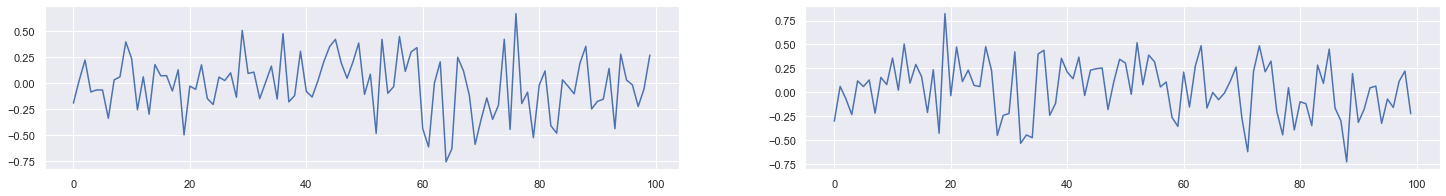

In [60]:
X = 0.3 * np.random.randn(100, 2)
X[0:5]
plt.rcParams["figure.figsize"] = (25,3)
fig, ax = plt.subplots(ncols=2) # 1 row by 2 columns
ax[0].plot(X[:, 0])
ax[1].plot(X[:, 1])

## 1.2 Generate train_data (X_train)

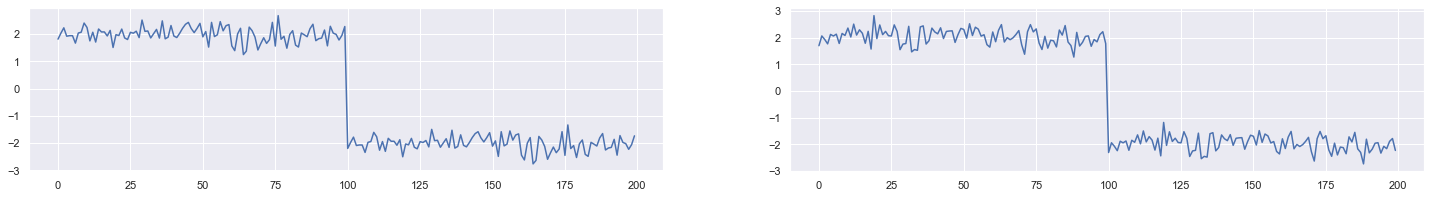

In [61]:
X_train = np.r_[X + 2, X - 2]
fig, ax = plt.subplots(ncols=2) # 1 row by 2 columns
ax[0].plot(X_train[:, 0])
ax[1].plot(X_train[:, 1])

## <font color='purple'> Case 1. X를 학습하여 X를 예측

In [65]:
clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma=0.1)
clf.fit(X).predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

### '-1'은 이상치로 x1, x2가 둘중에 하나가 과도하게 이상하면 '-1'판정(다변량분석)

<BarContainer object of 100 artists>

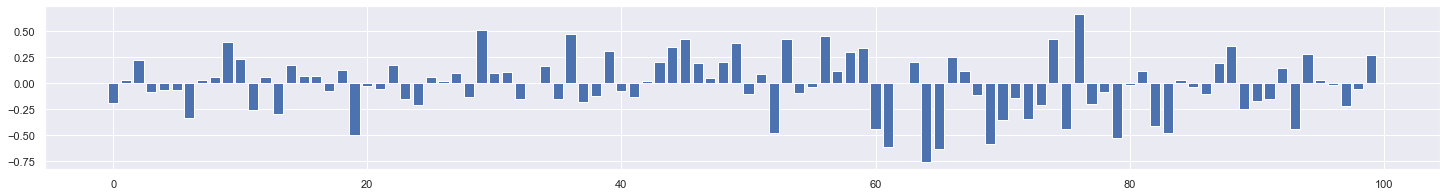

<BarContainer object of 100 artists>

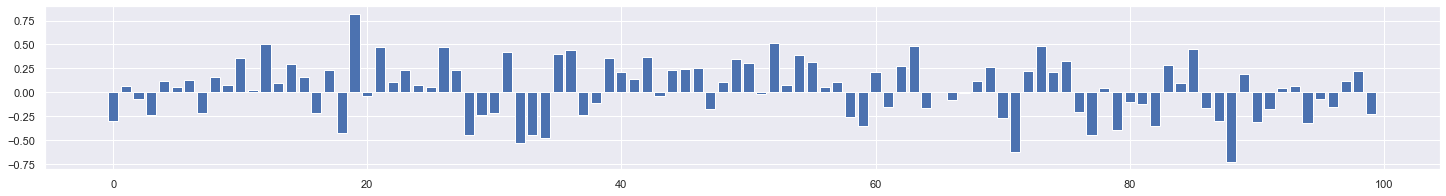

In [66]:
plt.bar(np.arange(len(X[:, 0])),X[:, 0]);plt.show()
plt.bar(np.arange(len(X[:, 1])),X[:, 1])

### 단변량의 이상치 탐색 결과와는 틀리다

In [67]:
clf.fit(X).predict(X)
clf.fit(X[:,0].reshape(-1,1)).predict(X[:,0].reshape(-1,1))
clf.fit(X[:,1].reshape(-1,1)).predict(X[:,1].reshape(-1,1))

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### X로 학습하여 X_train을 이상치 탐색하면 모두 '-1' 로 이상치로 판정

In [69]:
clf.fit(X).predict(X_train)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

## 3. 새로운 데이터 생성
## 3.1 X_test 20개 생성

In [77]:
X = 0.3 * np.random.randn(20, 2)  
X_test = np.r_[X + 2, X - 2]

## 3.2  비정상데이터(X_outliers) 20개 생성

In [78]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

### 새로운 정상데이터(X_test)와 비정상데이터(X_outliers) 그래프

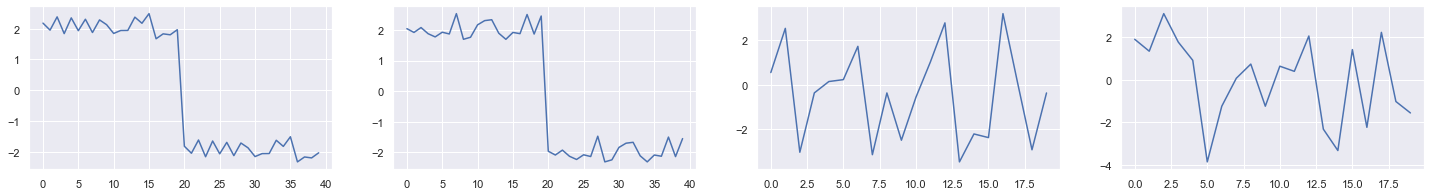

In [79]:
fig, ax = plt.subplots(ncols=4) # 1 row by 4 columns
ax[0].plot(X_test[:, 0])
ax[1].plot(X_test[:, 1])
ax[2].plot(X_outliers[:, 0])
ax[3].plot(X_outliers[:, 1])

## 3.3 학습과 예측
- 주로 kernel로 RBF사용 
- One Class SVM는 이상치가 없는 정상적인 훈련데이터를 학습하여 새로운 데이터를 분류(이진분류)
        * nu is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
          Should be in the interval (0, 1]. By default 0.5 will be taken. (margin error와 관계있음)
        * 파라미터 nu가 0.5라는 것은 훈련데이터의 misclassification error는 최대 5%라는 것이고 margin error는 최소 5%라는 
          (즉, 최소한 lower bound 마진에러를 감수하고 최대한 분류에러의 upper bound 확보)
### 예측
- OneClassSVM으로 각각의 데이터를 이진분류 예측 판단한 labeled y를 구한다

In [83]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_train

OneClassSVM(gamma=0.1, nu=0.1)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1], dtype=int64)

In [84]:
y_pred_test = clf.predict(X_test)
y_pred_test
y_pred_outliers = clf.predict(X_outliers)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1], dtype=int64)

array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

- y_pred_test는 새로운 데이터로 정상이 많은 데이터로 이상치 '-1'이 가끔 있다고 예측
- y_pred_outliers는 모두 비정상 --> 예측값이 '-1'이면 error임,

In [85]:
n_error_train = y_pred_train[y_pred_train == -1].size
print(f'X_train({len(X_train)})에서 오류 개수는 {n_error_train}, 오류확률 {n_error_train/len(X_train)*100} %')
n_error_test = y_pred_test[y_pred_test == -1].size
print(f'X_test({len(X_test)})에서 오류 개수는 {n_error_test}, 오류확률 {n_error_test/len(X_test)*100} %')
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print(f'X_outliers({len(X_outliers)})에서 오류 개수는 {n_error_outliers}, 오류확률 {n_error_outliers/len(X_outliers)*100} %')

X_train(40)에서 오류 개수는 4, 오류확률 10.0 %
X_test(40)에서 오류 개수는 5, 오류확률 12.5 %
X_outliers(20)에서 오류 개수는 1, 오류확률 5.0 %


Text(0.5, 1.0, 'Novelty Detection')

(-5.0, 5.0, -5.0, 5.0)

(-5.0, 5.0)

(-5.0, 5.0)

Text(0.5, 0, 'error train: 4/200 ; errors novel regular: 5/40 ; errors novel abnormal: 1/40')

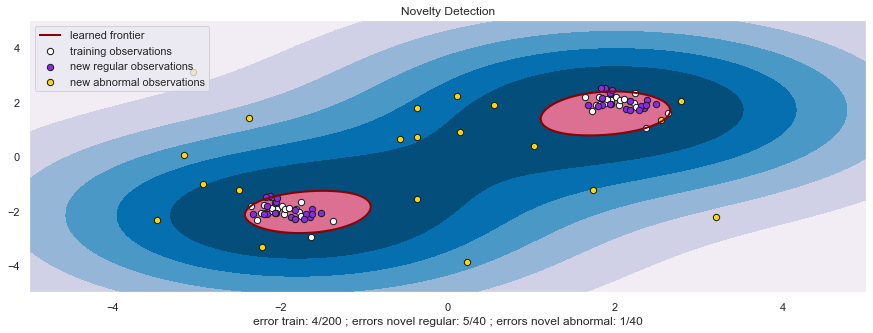

In [86]:
# plot the line, the points, and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(15,5))
plt.title("Novelty Detection")

# 생성 된 그리드 포인트의 수평 및 수직 좌표 행렬 초기화
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

# End